## Kvanttilaskenta, kierros 5

Kierroksella 5 käsiteltävät tehtävät pohjautuvat Qiskit tutoriaaleihin. Voit tutkia kierroksella 5 myös IBM:n alkuperäisiä tutoriaaleja, jotka löytyvät seuraavista linkeistä.

<a href="https://qiskit.org/textbook/content/ch-gates/multiple-qubits-entangled-states.ipynb" target="_blank">2.2 Multiple Qubits and Entangled States</a>

ja



<a href="https://qiskit.org/textbook/content/ch-gates/more-circuit-identities.ipynb" target="_blank">2.2 More Circuit Identities</a>

Tehtäviä on 3 kappaletta, tutki niistä 2 kappaletta. Tehtävässä 1 on ket-esityksen harjoittelua. Tehtävissä 2 ja 3 riittää käydä materiaali läpi. Tehtävän 3 voit suorittää myös siten, että ajat esimerkkikoodin kvanttinopasta oikealla kvanttitietokoneella. Kvanttinoppa on kvanttialgoritmilla toteutettu noppa, joka arpoo silmäluvut 1- 6 siten, että kaikilla lopputuloksilla on sama todennäköisyys. Tehtävä 3 kannattaa siis suorittaa oikealla kvanttikoneella.

Tehtävät voi palauttaa ma 22.3 luennon jälkeen.

### Tehtävä 1, kertaus Bellin tilat ja ket-vektoriesitys

Tehtävässä 1 tutkitaan kahden kubitin systeemiä, joten kerraan käytettävien kantavektorien ket- ja pystyvektoriesitys: 

![base_vectors](images/base_vectors.png)

### HUOM. käytämme qiskitin tutoriaalien notaatiota!

Kerrataan tarvittavat ket-vektorit ja niiden pystyvektoriesitykset:
missä $|0\rangle=\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ ja  $|1\rangle=\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Yllä esitetyt kahden kubitin tilaa esittävien ket-vektorit ja pystyvektorit perustuvat siis seuraavaan tensoritulon määritelmään:


$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix}
$$


Lisäksi tarvitsemme kubitin superpositiotilat $|+\rangle$ ja  $|-\rangle$:

$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \ket +   \\
H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \ket -
$$


Tuodaan tarvittavat kirjastot ensin käyttöön:

In [63]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Tehtävässä 1 on tavoitteena tutkia miten CNOT-portti vaikuttaa kahden kubitin systeemiin 
$$
|0{+}\rangle = |0\rangle \otimes |+\rangle =|0\rangle( \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)) \frac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

Muodostetaan ensin tutkittava kahden kubitin systeemi $|0{+}\rangle $. Aloitetaan superpositiotilan  $|+\rangle=H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ muodostamisella operoimalla Hadamard-portilla kubittiin $|0\rangle$. 

Alla koodissa 1.Kubitti on superpositiossa, 2.kubitti jää tilaan 0.

In [56]:
qc = QuantumCircuit(2)# kahden kubitin piiri
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

Lasketaan seuraavaksi tensoritulo ket-esityksessä: $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$, jolloin saadaan määriteltyä kahden kubitin systeemin tilavektori:

$$
|0{+}\rangle =|0 \rangle(\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)) = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$


Huomaa, että kahden kubitin tilavektorissa jälkimmäinen $|+\rangle$ on 1.kubitti ja $|0\rangle$ 2.kubitti. Järjestys voi olla näin, koska kubitit luodaan samanaikaisesti.  Lue tilavektoria oikealta vasemmalle! Järjestyksellä on meille merkitystä kun operoimme kahden kubitin välisellä CNOT-portilla.

Kahden kubitin systeemiä esittävien ket-vektorien $|00\rangle$ ja $|01\rangle$ pystyvektoriesitys:

$|00\rangle=\begin{bmatrix} 1 \\ 0 \\ 0 \\0 \end{bmatrix}$ ja $|01\rangle=\begin{bmatrix} 0 \\ 1 \\ 0 \\0 \end{bmatrix}$.


Sama pythonilla, piirretään samalla tilavektorin pystyvektoriesitys $|0{+}\rangle$: 

HUOM: Voit asentaa latex- kirjaston komennolla: pip install array_to_latex,
jos haluat tulostaa jupyter-notebookissa pystyvektorin

In [64]:
#HUOM asennus latex -työkalun asennus: pip install array_to_latex
from qiskit_textbook.tools import array_to_latex

# Let's see the result:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
# Print the statevector neatly:
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

Seuraavaksi tilavektoriin $|0{+}\rangle$ Operoidaan tilavektoriin CNOT-portilla, 1.kubitti $|+\rangle$ on ohjaava kubitti ja 2.kubitti on kohde. 

###  HUOMAA: CNOT-portin matriisiesitys, kun target = 0 ja control =+:



$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0} 
$$

Python-koodi:



In [65]:
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐┌─┴─┐
q_1: ─────┤ X ├┤ X ├
          └───┘└───┘

In [66]:
# Let's get the result:
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

CNOT-portilla operoinnin jälkeen päädyttiin tilaan, joka voidaan esittää ket-esityksessä:
    
$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 


a) Mitkä on CNOT-portilla operoimisen jälkeen mahdollisten mitattavien lopputilojen $|00\rangle$ ja $|11\rangle$ todennäköisyydet? Onko lopputila $|01\rangle$ mahdolllinen? Päättele ketvektoriesityksen kertoimista?


b) Tarkista a-kohta simuloimalla tilavektori:

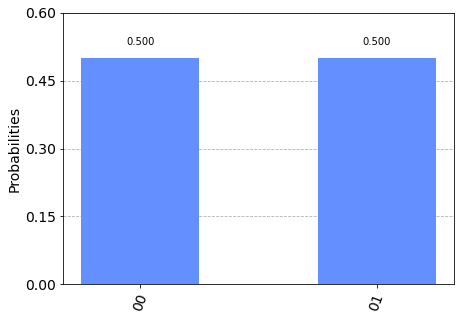

In [67]:
plot_histogram(result.get_counts())

c) Luo kvanttipiiri, joka luo Bellin tilan $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.

d) Ei pakollinen Lisätehtävä:  Muodosta matriisi M, jolla operoimalla tilaan  $|00\rangle$ saadaan lopputulokseksi tila $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$. Onko matriisi unitaarinen? 

## Tehtävä 1 RATKAISUT

a) Molempien tilojen todennäköisyys on 50%, tämä nähdään tilavektorin kertoimesta.

$P(|00\rangle)=P(|11\rangle)= (\frac{1}{\sqrt{2}})^2 =0.5$

### HUOMAA: Jos kahden kubitin tilavektorissa 1.kubitti on ohjaava, ja 2.kubitti kohde, niin silloin CNOT:

$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} 
$$


b)Tehtävän 1 johdantoesimerkin python-koodissa muodostettiin kahden kubitin systeemi ns. Bellintila $|\phi\rangle^+$, jonka ket-esitys (ja pystyvektoriesitys) saadaan koodin etenemistä seuraamalla seuraavasti:

$$\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes|0\rangle=
\frac{1}{\sqrt{2}}(|00\rangle+|10\rangle) \xrightarrow {\text CNOT} \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 0 \\ 0 \\1 \end{bmatrix}
$$

missä siis muodostettiin Bellin kantavektori lomittamalla kaksi kubittia:
$$
|\phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$

Koska tila $|+\rangle$ määriteltiin seuraavasti:  $|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$, voidaan yllä oleva ket-esitys esittä tilan $|+\rangle$ avulla:

$$
|+0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)|0\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|10\rangle) \xrightarrow {\text CNOT} \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)
$$



## Tehtävä 1 B ratkaisu
b) Tavoitteena luoda Bellin tila, eli kantavektori $|\psi^+\rangle=\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.

Tarkastellaan ensin ket-esityksen avulla

$$\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes|1\rangle=
\frac{1}{\sqrt{2}}(|01\rangle+|11\rangle) \xrightarrow {\text CNOT} \frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)= \frac{1}{\sqrt{2}}\begin{bmatrix} 0 \\ 1 \\ 1 \\0 \end{bmatrix}
$$


On siis muodostettava H-portilla 1.kubitin tila $|+\rangle$ ja 2.kubitti on laitettava X-portilla tilaan $|1\rangle$. Tämän jälkeen kubitit lomitetaan CNOT-portilla

In [72]:
qc2 = QuantumCircuit(2)# kahden kubitin piiri
qc2.h(0)
qc2.x(1)
qc2.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [73]:
qc2.cx(0,1)
qc2.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [74]:
# Let's get the result:
qobj = assemble(qc2)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

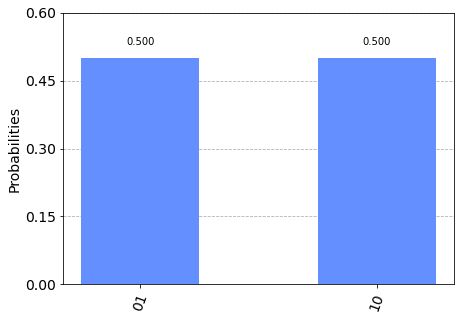

In [75]:
plot_histogram(result.get_counts())

d) Lisätehtäväkohta 
we can represent the simultaneous operations (H & X) using their tensor product:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. This can become quite messy, you will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

Instead of calculating this by hand, we can use Qiskit’s `unitary_simulator` to calculate this for us. The unitary simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [77]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc2)
unitary = usim.run(qobj).result().get_unitary()

In [78]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

<IPython.core.display.Math object>

In [85]:
import numpy as np
import math

k = 1 /math.sqrt(2)
print("matriisi M")
M = np.array([[0,0,k,k], [k,-k,0,0], [k, k, 0,0], [0,0,k,-k]])
print(M)

print("kantavektori")
q00 =np.array([[1],[0],[0],[0]])
print(q00)

print("lasketaan matriisin M ja kantavektorin tulo")
print(M@q00)

print("onko unitaarinen")
print(M@M)

X = np.array([[0,1], [1,0]])
print(X)

print("xx")
print(X@X)

matriisi M
[[ 0.          0.          0.70710678  0.70710678]
 [ 0.70710678 -0.70710678  0.          0.        ]
 [ 0.70710678  0.70710678  0.          0.        ]
 [ 0.          0.          0.70710678 -0.70710678]]
kantavektori
[[1]
 [0]
 [0]
 [0]]
lasketaan matriisin M ja kantavektorin tulo
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]
onko unitaarinen
[[ 0.5  0.5  0.5 -0.5]
 [-0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]]
[[0 1]
 [1 0]]
xx
[[1 0]
 [0 1]]


## Lisätietoa tehtävä 1
Muut Bellin kantavektorit, ja niiden muodostaminen, muista

$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \ket +   \\
H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \ket -
$$


Kantavektorin $|\phi^-\rangle$ muodostaminen
$$
\frac 1 {\sqrt 2} (|0\rangle - |1\rangle)\otimes |0\rangle
= \frac 1 {\sqrt 2}(| 0\rangle |0\rangle - |1\rangle | 0\rangle) = \frac 1 {\sqrt 2} (|00\rangle - |1 0\rangle)
\xrightarrow {\text CNOT} \frac 1 {\sqrt 2} (|00\rangle - |1 0\rangle)=|\phi^-\rangle
$$

eli on siis laitettava 1.kubitti ensi tilaan 1 ja operoitava tähän sitten H-portilla. Sitten lomitetaan kubitit 1 ja 2.

$$
|-0\rangle \xrightarrow {\text CNOT}\frac 1 {\sqrt 2} (|00\rangle - |1 0\rangle)=|\phi^-\rangle
$$


ja Bellin tila eli kantavektori $|\psi^-$:


$$
\frac 1 {\sqrt 2} (|0\rangle - |1\rangle)\otimes |1\rangle
 = \frac 1 {\sqrt 2} (|01\rangle - |1 1\rangle)
\xrightarrow {\text CNOT} \frac 1 {\sqrt 2} (|01\rangle - |1 0\rangle)=|\psi^-\rangle
$$

eli

$$
|-1\rangle \xrightarrow {\text CNOT}\frac 1 {\sqrt 2} (|01\rangle - |1 0\rangle)=|\psi^-\rangle
$$

## Lisätehtävä 1d)

Simuiloidaan vielä b-kohdan kvanttipiiri. 

$$
CNOT |+1\rangle \xrightarrow {\text CNOT}\frac 1 {\sqrt 2} (|01\rangle + |1 0\rangle) 
$$

In [43]:
from qiskit import *
import math

# Luodaan kvanttipiiri muuttujaan circ, jossa on yksi kubitti (diagrammissa q).
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)  # 
circuit.h(0)
circuit.x(1)
circuit.cx(0,1)

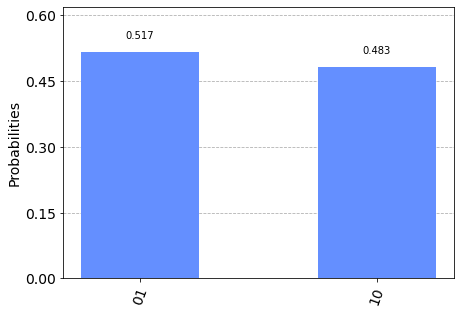

In [44]:
circuit.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [49]:
# laske a-kohdan tulot tähän pythonilla, katso esimerkkiä kierroksen 1 ratkaisuista. 
# matriisin ja pystyvektorin tulossa kertomerkki on @
import numpy as np
from math import sqrt

# määritellään pystyvektorina kubitin kvanttitila 0:
print("q01: ")
q01 = np.array([[0],[1],[0],[0]])
print(q01)

# määritellään pystyvektorina kubitin kvanttitila 1:
print("q11: ")
q11 = np.array([[0],[0],[0],[1]])
print(q11)

print("CNOT: ")
CNOT =np.array([[1, 0, 0,0 ],[0,1,0, 0], [0,0,0, 1], [0,0,1, 0]])
print(CNOT)

q01: 
[[0]
 [1]
 [0]
 [0]]
q11: 
[[0]
 [0]
 [0]
 [1]]
CNOT: 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [54]:
print("two_qubit_state")
two_qubit_state = (1/sqrt(2))*(q01+q11)
print(two_qubit_state)

print("psi")
psi = CNOT@two_qubit_state
print(psi)

two_qubit_state
[[0.        ]
 [0.70710678]
 [0.        ]
 [0.70710678]]
psi
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]


Jos CNOT on unitaarinen sen matriisitulo itsensäkanssa on identiteettimatriisi:

In [55]:
print(CNOT@CNOT)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


## Tehtävä 2 Swapping states
Lähde: <a href="https://qiskit.org/textbook/content/ch-gates/more-circuit-identities.ipynb" target="_blank">2.2 More Circuit Identities</a>

Sometimes we need to move information around in a quantum computer. For some qubit implementations, this could be done by physically moving them. Another option is simply to move the state between two qubits. This is done by the SWAP gate.

In [96]:
a = 0
b = 1

In [105]:
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
qc = QuantumCircuit(quantum_register, classical_register)
# swaps states of qubits a and b
qc.x(0)
qc.swap(a,b)
qc.draw()

┌───┐   
q44_0: ┤ X ├─X─
       └───┘ │ 
q44_1: ──────X─
               
 c3: 2/════════

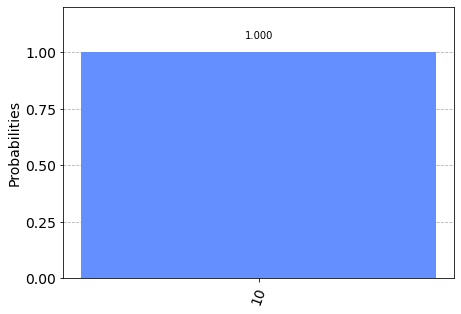

In [106]:
qc.measure(quantum_register, classical_register)
simulator = Aer.get_backend('qasm_simulator')
execute(qc, backend=simulator)
result = execute(qc, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

The command above directly invokes this gate, but let's see how we might make it using our standard gate set. For this, we'll need to consider a few examples.

First, we'll look at the case that qubit a is in state $|1\rangle$ and qubit b is in state $|0\rangle$. For this we'll apply the following gates:

In [99]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

This has the effect of putting qubit b in state  |1⟩  and qubit a in state  |0⟩ . In this case at least, we have done a SWAP.

Now let's take this state and SWAP back to the original one. As you may have guessed, we can do this with the reverse of the above process:



In [19]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

┌───┐┌───┐     
q_0: ──■──┤ X ├┤ X ├──■──
     ┌─┴─┐└─┬─┘└─┬─┘┌─┴─┐
q_1: ┤ X ├──■────■──┤ X ├
     └───┘          └───┘

Note that in these two processes, the first gate of one would have no effect on the initial state of the other. For example, when we swap the  |1⟩  b to a, the first gate is cx(b,a). If this were instead applied to a state where no  |1⟩  was initially on b, it would have no effect.

Note also that for these two processes, the final gate of one would have no effect on the final state of the other. For example, the final cx(b,a) that is required when we swap the  |1⟩  from a to b has no effect on the state where the  |1⟩  is not on b.

With these observations, we can combine the two processes by adding an ineffective gate from one onto the other. For example,

In [21]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

We can think of this as a process that swaps a $|1\rangle$ from a to b, but with a useless `qc.cx(b,a)` at the beginning. We can also think of it as a process that swaps a $|1\rangle$ from b to a, but with a useless `qc.cx(b,a)` at the end. Either way, the result is a process that can do the swap both ways around.

It also has the correct effect on the $|00\rangle$ state. This is symmetric, and so swapping the states should have no effect. Since the CNOT gates have no effect when their control qubits are $|0\rangle$, the process correctly does nothing.

The $|11\rangle$ state is also symmetric, and so needs a trivial effect from the swap. In this case, the first CNOT gate in the process above will cause the second to have no effect, and the third undoes the first. Therefore, the whole effect is indeed trivial.

We have thus found a way to decompose SWAP gates into our standard gate set of single-qubit rotations and CNOT gates.

It works for the states  |00⟩ ,  |01⟩ ,  |10⟩  and  |11⟩ , and if it works for all the states in the computational basis, it must work for all states generally. This circuit therefore swaps all possible two-qubit states.

The same effect would also result if we changed the order of the CNOT gates:

In [22]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

This is an equally valid way to get the SWAP gate.

The derivation used here was very much based on the z basis states, but it could also be done by thinking about what is required to swap qubits in states  |+⟩  and  |−⟩ . The resulting ways of implementing the SWAP gate will be completely equivalent to the ones here.



## Tehtävä 3

Lue artikkeli kvanttinoppa ja erityisesti miten nopan silmäluvut 1- 6 voidaan ohjelmoida kehittyneemmällä kvanttialgoritmilla.

<a href="https://www.lukemaverkosto.fi/materiaali/microbit-kvanttinoppa/" target ="_blank"> Microbit kvanttinoppa</a>

Artikkelin alussa oleva helppo esimerkki on lämmittelyä. Perehdy R-kiertoportilla toteutettuun versioon.

Jos haluat ohjelmoida kvanttinopan oikealla kvanttitietokoneella, koodin löydät täältä:

<a href ="https://www.lukemaverkosto.fi/wp-content/uploads/2020/11/kvanttinoppa.html">Esimerkkikoodi</a>

In [107]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
import math

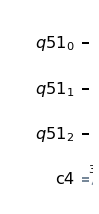

In [108]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.draw(output="mpl")

In [109]:
# Käännetään kubittia kohdassa 2 sopivan määrän, jotta saadaan 1 todennäköisyydellä 2/3
# Matematiikka luvun taustalla löytyy artikkelista
circuit.ry(2 * math.asin(math.sqrt(2/3)), 2)

circuit.ch(2, 1) # controlled controlled H
circuit.x(2)
circuit.h(0)

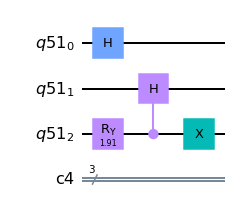

In [110]:
circuit.draw(output="mpl")

In [111]:
circuit.barrier()

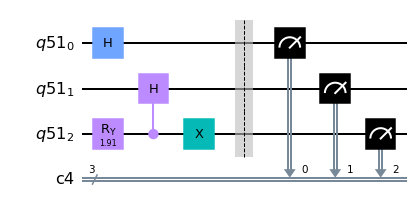

In [112]:
circuit.measure(qr, cr)
circuit.draw(output="mpl")

In [113]:
# käytetään simulaattoria, eli ei ajeta ohjelmaa oikealla kvanttitietokoneella
computer = Aer.get_backend("qasm_simulator")

In [114]:
r = execute(circuit, computer).result()

In [115]:
r.get_counts()

{'000': 170, '001': 160, '010': 179, '011': 174, '100': 188, '101': 153}

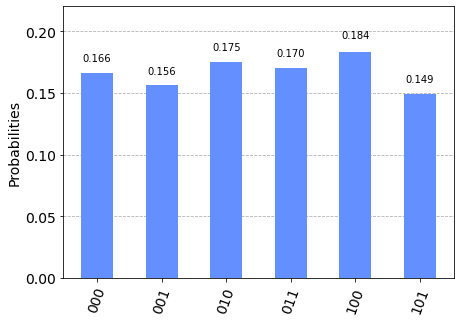

In [116]:
plot_histogram(r.get_counts())

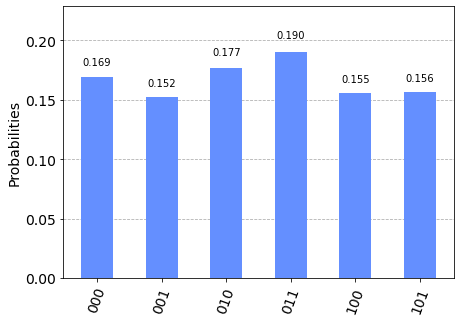

In [123]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [ ]:
# Lähetetään koodi oikealle kvanttikoneelle. Ole kärsivällinen, odota kvanttitietokoneen vastausta.
# Kun Jupyter odottaa vastausta, välilehden kuvakkeena näkyy tiimalasi..
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job) # Koodi jää odottamaan tähän, kun lähetys on jonossa ja käsiteltävänä

result = job.result()
plot_histogram(result.get_counts(circuit))

ibmqfactory.load_account:WARNING:2021-03-22 16:22:51,321: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (None)  